#### Reverse Delete Algorithm for Minimum Spanning Tree


Reverse Delete algorithm is closely related to Kruskal’s algorithm. In Kruskal’s algorithm what we do is : Sort edges by increasing order of their weights. After sorting, we one by one pick edges in increasing order. We include current picked edge if by including this in spanning tree not form any cycle until there are V-1 edges in spanning tree, where V = number of vertices.

In Reverse Delete algorithm, we sort all edges in decreasing order of their weights. After sorting, we one by one pick edges in decreasing order. We include current picked edge if excluding current edge causes disconnection in current graph. The main idea is delete edge if its deletion does not lead to disconnection of graph.


The Algorithm :

- Sort all edges of graph in non-increasing order of edge weights.
- Initialize MST as original graph and remove extra edges using step 3.
- Pick highest weight edge from remaining edges and check if deleting the edge disconnects the graph or not.
    - If disconnects, then we don’t delete the edge.
    - Else we delete the edge and continue. 

##### Illustration: 

Let us understand with the following example:

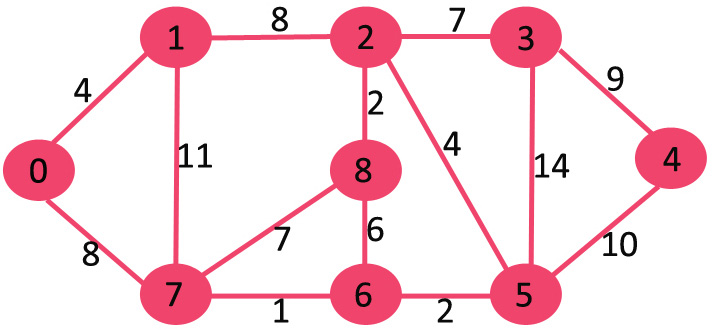

In [2]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Minimum Spanning Tree/img/rd1.jpg")

If we delete highest weight edge of weight 14, graph doesn’t become disconnected, so we remove it. 


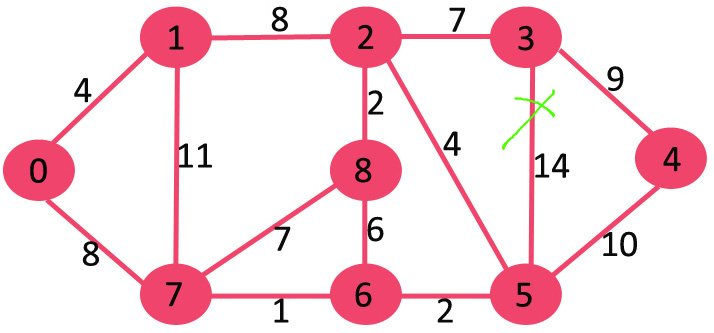

In [3]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Minimum Spanning Tree/img/rd2.jpg")

Next we delete 11 as deleting it doesn’t disconnect the graph. 


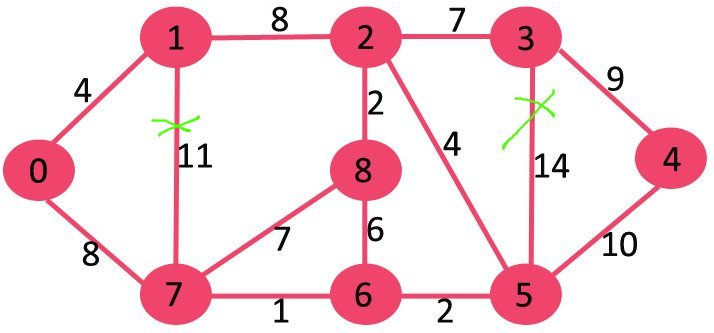

In [4]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Minimum Spanning Tree/img/rd3.jpg")

Next we delete 10 as deleting it doesn’t disconnect the graph. 


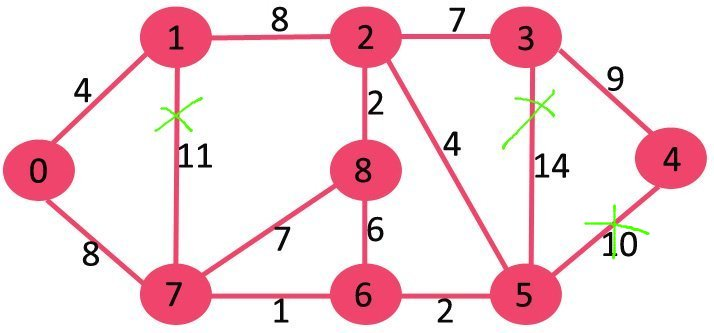

In [5]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Minimum Spanning Tree/img/rd4.jpg")

Next is 9. We cannot delete 9 as deleting it causes disconnection. 


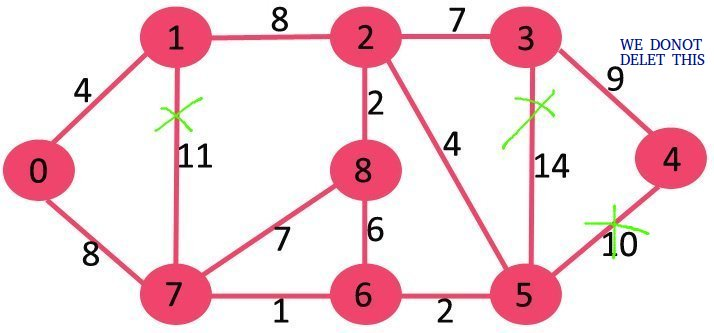

In [6]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Minimum Spanning Tree/img/rd5.jpg")

We continue this way and following edges remain in final MST. 

    Edges in MST
    (3, 4) 
    (0, 7) 
    (2, 3) 
    (2, 5) 
    (0, 1) 
    (5, 6) 
    (2, 8) 
    (6, 7) 

Note: 

In case of same weight edges, we can pick any edge of the same weight edges.

In [1]:
class Graph:
	def __init__(self, v):
		self.v = v
		self.adj = [0] * v
		self.edges = []
		for i in range(v):
			self.adj[i] = []

	def addEdge(self, u: int, v: int, w: int):
		self.adj[u].append(v)
		self.adj[v].append(u)
		self.edges.append((w, (u, v)))

	def dfs(self, v: int, visited: list):
		visited[v] = True
		for i in self.adj[v]:
			if not visited[i]:
				self.dfs(i, visited)

	def connected(self):
		visited = [False] * self.v
		self.dfs(0, visited)
		for i in range(1, self.v):
			if not visited[i]:
				return False
		return True

	def reverseDeleteMST(self):
		self.edges.sort(key = lambda a: a[0])
		mst_wt = 0 
		print("Edges in MST")
  
		for i in range(len(self.edges) - 1, -1, -1):
			u = self.edges[i][1][0]
			v = self.edges[i][1][1]
			self.adj[u].remove(v)
			self.adj[v].remove(u)
			if self.connected() == False:
				self.adj[u].append(v)
				self.adj[v].append(u)
				print("( %d, %d )" % (u, v))
				mst_wt += self.edges[i][0]
		print("Total weight of MST is", mst_wt)

if __name__ == "__main__":
	V = 9
	g = Graph(V)
	g.addEdge(0, 1, 4)
	g.addEdge(0, 7, 8)
	g.addEdge(1, 2, 8)
	g.addEdge(1, 7, 11)
	g.addEdge(2, 3, 7)
	g.addEdge(2, 8, 2)
	g.addEdge(2, 5, 4)
	g.addEdge(3, 4, 9)
	g.addEdge(3, 5, 14)
	g.addEdge(4, 5, 10)
	g.addEdge(5, 6, 2)
	g.addEdge(6, 7, 1)
	g.addEdge(6, 8, 6)
	g.addEdge(7, 8, 7)

	g.reverseDeleteMST()

Edges in MST
( 3, 4 )
( 0, 7 )
( 2, 3 )
( 2, 5 )
( 0, 1 )
( 5, 6 )
( 2, 8 )
( 6, 7 )
Total weight of MST is 37


##### Time complexity: O((E*(V+E)) + E log E) where E is the number of edges.

##### Space complexity: O(V+E) 

where V is the number of vertices and E is the number of edges. We are using adjacency list to store the graph, so we need space proportional to O(V+E).

Notes : 

- The above implementation is a simple/naive implementation of Reverse Delete algorithm and can be optimized to O(E log V (log log V)3) [Source : Wiki]. But this optimized time complexity is still less than Prim and Kruskal Algorithms for MST.

- The above implementation modifies the original graph. We can create a copy of the graph if original graph must be retained.